In [1]:
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization, CuDNNLSTM

2022-03-24 10:47:42.720023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-24 10:47:42.720056: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [21]:
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt  
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape[1:])
print(x_train[0].shape)
x_train=x_train/255.0
x_test=x_test/255.0

(28, 28)
(28, 28)


Image name label belong to  5


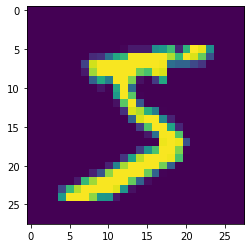

In [28]:
plt.imshow(x_train[0])
print("Image name label belong to ",y_train[0])

In [14]:
model=Sequential()
model.add(LSTM(128,input_shape=(x_train.shape[1:]),activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_9 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [6]:
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 194s 102ms/step - loss: 0.5927 - accuracy: 0.8076 - val_loss: 0.1415 - val_accuracy: 0.9559
Epoch 2/3
1875/1875 [==============================] - 226s 120ms/step - loss: 0.1632 - accuracy: 0.9557 - val_loss: 0.1022 - val_accuracy: 0.9681
Epoch 3/3
1875/1875 [==============================] - 195s 104ms/step - loss: 0.1053 - accuracy: 0.9715 - val_loss: 0.0626 - val_accuracy: 0.9835


In [7]:
import wandb 

In [9]:
!wandb login "API keys"

wandb: Appending key for api.wandb.ai to your netrc file: /home/ameer/.netrc


In [31]:
y_pred=model.predict(x_test)
y_pred=[np.argmax(i) for i in y_pred]
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9791


In [11]:
import wandb
from wandb.keras import WandbCallback

wandb.init(project="Mnist with LSTM and CuDNNLSTM", entity="ameer08")
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 100,
  "batch_size": 128
}

# ... Define a model


2022-03-24 11:04:00.622413: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-24 11:04:00.622452: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
model=Sequential()
model.add(CuDNNLSTM(128,input_shape=(x_train.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(128))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm (CuDNNLSTM)      (None, 28, 128)           80896     
                                                                 
 dropout_6 (Dropout)         (None, 28, 128)           0         
                                                                 
 cu_dnnlstm_1 (CuDNNLSTM)    (None, 128)               132096    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [17]:
model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=2, callbacks=[WandbCallback()])

Epoch 1/2
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1775 - accuracy: 0.9515 - val_loss: 0.1190 - val_accuracy: 0.9702 - _timestamp: 1648100415.0000 - _runtime: 379.0000
Epoch 2/2
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1200 - accuracy: 0.9677 - val_loss: 0.0979 - val_accuracy: 0.9744 - _timestamp: 1648100525.0000 - _runtime: 489.0000


In [33]:
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4071 - accuracy: 0.8759 - val_loss: 0.1246 - val_accuracy: 0.9620
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1249 - accuracy: 0.9668 - val_loss: 0.0971 - val_accuracy: 0.9716
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0873 - accuracy: 0.9770 - val_loss: 0.0546 - val_accuracy: 0.9841


In [19]:
import numpy as np  

In [20]:
y_pred=model.predict(x_test)
y_pred=[np.argmax(i) for i in y_pred]
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9744
